# The Central Limit Theorem

Author: Jake VanderPlas
License: BSD
The figure produced by this code is published in the textbook "Statistics, Data Mining, and Machine Learning in Astronomy" (2013). For more information, see http://astroML.github.com . To report a bug or issue, use the following forum https://groups.google.com/forum/#!forum/astroml-general 

Modified by Pietro Vischia for use in a Statistics Course (to make the number of generated data configurable, and to hide the predefined values in the M array, and to make nomenclature consistent with the slides (N-->M) )

In [7]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

We want to test how good is the gaussian approximation provided by the Central Limit Theorem.



In [12]:
# Generate uniform samples
# N is the number of random variables that are averaged
# i.e. Q = \sum_{i=1}^{M} x_i

M = [1, 2, 5, 10]

In [16]:
# Set the number of data to generate, and generate the data

Ndata = int(1000)

np.random.seed(42)
x = np.random.random((max(M), Ndata))

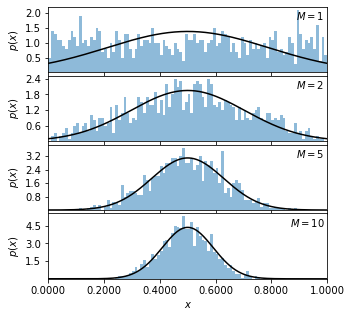

In [18]:

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(5, 5))
fig.subplots_adjust(hspace=0.05)

for i in range(len(M)):
    ax = fig.add_subplot(len(M), 1, i + 1)

    # take the mean of the first N[i] samples
    x_i = x[:M[i], :].mean(0)

    # histogram the data
    ax.hist(x_i, bins=np.linspace(0, 1, 101),
            histtype='stepfilled', alpha=0.5, density=True)

    # plot the expected gaussian pdf
    mu = 0.5
    sigma = 1. / np.sqrt(12 * M[i])
    dist = norm(mu, sigma)
    x_pdf = np.linspace(-0.5, 1.5, 1000)
    ax.plot(x_pdf, dist.pdf(x_pdf), '-k')

    ax.set_xlim(0.0, 1.0)
    ax.set_ylim(0.001, None)

    ax.xaxis.set_major_locator(plt.MultipleLocator(0.2))
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))

    ax.text(0.99, 0.95, r"$M = %i$" % M[i],
            ha='right', va='top', transform=ax.transAxes)

    if i == len(M) - 1:
        ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%.4f'))
        ax.set_xlabel(r'$x$')
    else:
        ax.xaxis.set_major_formatter(plt.NullFormatter())

    ax.set_ylabel('$p(x)$')

plt.show()
